In [629]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [630]:
# Functions that are used throughout the project 
def call_data(name,columns_dropped):

#Reading the documento CSV
    db = pd.read_csv(name)

# Drop the columns which are gonna be unecessary to the analysis
    db.drop(db.columns[columns_dropped],axis=1,inplace=True)
    return db

In [631]:
# Applying the function to get the dataframe
prices_clean = call_data("olist_order_items_dataset.csv",[1,3,4])

In [632]:
# Sum the delivery total price including the freigh_value  
prices_clean["total_price"] = prices_clean[["price","freight_value"]].sum(axis=1)

In [633]:
# We use the group method in this case to remove the duplicates since there are some orders with more than one item, thats why 
# we need to group the database based on the order_id. Therefore, we won't have a number different from 1 in the order_item_id 
prices_clean_group = prices_clean.groupby(["order_id"]).sum()

In [634]:
# Applying the function to get the dataframe
customers_clean = call_data("olist_customers_dataset.csv",[1,2])

In [635]:
# Applying the function to get the dataframe
orders = call_data("olist_orders_dataset.csv",[2,3,4,5,6,7])

In [636]:
# Same explanation as the prices table 
orders_group = orders.groupby(["order_id"]).sum()

In [637]:
# Merge of the prices and orders table in order to link the prices with the customers (creating a primary key grouping method)
orders_prices_merged = orders_group.merge(prices_clean_group,left_index=True,right_index=True,how="left")

In [638]:
# Make sure there is no duplicates in the column customer_id in the table merged. And if there is, their prices will be added
orders_prices_merged = orders_prices_merged.groupby(["customer_id"]).sum()

In [639]:
# Verifying if there is no duplicates in cusomer_id in table customers_clean
customers_clean.drop_duplicates(subset = "customer_id", inplace=True)

In [640]:
# Set the index customer_id in order to merge 
customers_clean.set_index("customer_id",inplace=True)

# Merge (Same way as for orders_prices_merged)
orders_prices_customers_merged = orders_prices_merged.merge(customers_clean,left_index=True,right_index=True,how ="left")

The number of rows are not matching because there are orders on the table olist_orders_dataset which are not linked with any item.
They will be desconsidered doing the merge itself 

In [641]:
# Check if there is no null and if the type of the data on the columns make sense 
orders_prices_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 00012a2ce6f8dcda20d059ce98491703 to ffffe8b65bbe3087b653a978c870db99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           99441 non-null  float64
 1   freight_value   99441 non-null  float64
 2   total_price     99441 non-null  float64
 3   customer_city   99441 non-null  object 
 4   customer_state  99441 non-null  object 
dtypes: float64(3), object(2)
memory usage: 6.6+ MB


In [642]:
# There is no missing values in the dataframe, but if had it i would solve as shown below
orders_prices_customers_merged["price"].fillna(0,inplace=True) # or
orders_prices_customers_merged["customer_state"].fillna("",inplace=True) # depends on the column its missing

In [643]:
# Sorting total_price values
orders_prices_customers_merged.sort_values(by=["total_price"], ascending=False,inplace=True)

In [644]:
#Preparing the data to be shown based on the aim of the project as a table
value_state_table = orders_prices_customers_merged.groupby(["customer_state","customer_city"])["total_price"].agg([np.mean,np.sum])

#Sorting the values to show in a small table
value_state_table.sort_values(by=["sum"], ascending=False,inplace=True)

In [645]:
# Subsetting the dataframe in order to get just the mos relevant categories and make the table clean 
value_state_table = value_state_table[value_state_table["sum"]>120000]

In [646]:
#Preparing the data to be shown based on the aim of the project as a chart
value_state = orders_prices_customers_merged.groupby(["customer_city"])["total_price"].agg([np.mean,np.sum])

#Sorting the values to show in the chart just the biggest ones
value_state.sort_values(by=["sum"], ascending=False,inplace=True)

In [647]:
# Subsetting the dataframe in order to get just the mos relevant categories and make the chart clean 
value_state_s = value_state[value_state["sum"]>120000]

print(value_state_table)

                                     mean         sum
customer_state customer_city                         
SP             sao paulo       139.654255  2170227.12
RJ             rio de janeiro  167.717817  1154234.02
MG             belo horizonte  150.282506   416733.39
DF             brasilia        165.323857   352305.14
PR             curitiba        160.907212   244739.87
RS             porto alegre    162.483024   224064.09
BA             salvador        174.114378   216772.40
SP             campinas        147.189543   212541.70
               guarulhos       137.574281   163575.82
RJ             niteroi         162.449211   137919.38
GO             goiania         179.278223   124060.53


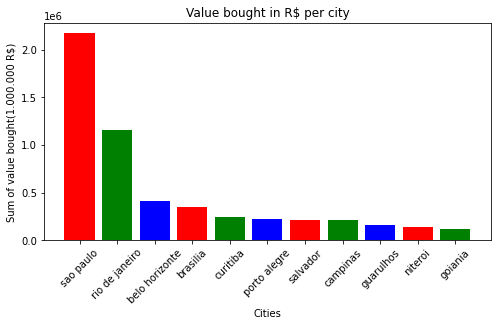

In [648]:
# Plotting the chart 1 showing the value bought overthe cities
# I've rotated the x label and the color to get easier to understand it 
plt.bar(value_state_s.index,value_state_s["sum"],color=['red', 'green', 'blue'])
plt.xticks(rotation=45)
plt.ylabel("Sum of value bought(1.000.000 R$)")
plt.xlabel("Cities")
plt.title("Value bought in R$ per city")
plt.gcf().set_size_inches(8, 4)
plt.show()

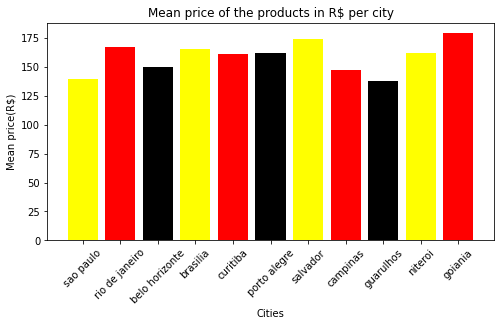

In [649]:
# Plotting the chart 2 showing the mean prices of the products over the cities
# Same modifications for this chart 
plt.bar(value_state_s.index,value_state_s["mean"],color=['yellow', 'red', 'black'])
plt.xticks(rotation=45)
plt.ylabel("Mean price(R$)")
plt.xlabel("Cities")
plt.title("Mean price of the products in R$ per city")
plt.gcf().set_size_inches(8, 4)
plt.show()

# Now we're going to start a new research and code to get other results from other resources 

In [650]:
# Applying the function to get the dataframe
products_names = call_data("product_category_name_translation.csv",[])

#Set index to merge with the other DF which there is the same data columns 
products_names.set_index("product_category_name",inplace=True)

In [651]:
# Applying the function to get the dataframe
products_ids = call_data("olist_products_dataset.csv",[2,3,4,5,6,7,8])

#Set index to merge with the other DF which there is the same data columns 
products_ids.set_index("product_category_name",inplace=True)

In [652]:
# Merge the two tables to get the relation between the product id and his name in english 
products_ids_merged = products_ids.merge(products_names,left_index=True,right_index=True,how ="left")

In [653]:
# Verifying if there is no duplicates in product_id in table customers_clean
products_ids_merged.drop_duplicates(subset = "product_id", inplace=True)

In [654]:
# Count how many products has no name label 
Null_count = (products_ids_merged["product_category_name_english"].isnull().sum())

#Drop NaN values which is not interesting for me 
products_ids_merged.dropna(inplace=True)

In [655]:
#Change the index to merge with another table through the same column 
products_ids_merged.set_index("product_id",inplace=True)

In [656]:
# Applying the function to get the dataframe
prices = call_data("olist_order_items_dataset.csv",[3,4])

In [657]:
# Sum the delivery total price including the freigh_value  
prices["total_price"] = prices[["price","freight_value"]].sum(axis=1)

#Change the index to merge with another table through the same column 
prices.set_index("product_id",inplace=True)

In [658]:
# Merge the two tables in order to get the relation between the classification in english and the price of the order
products_prices_merged = prices.merge(products_ids_merged,left_index=True,right_index=True,how ="left")

In [659]:
# Set the index which is going to be the x axis of the chart in the future 
products_prices_merged.set_index("product_category_name_english",inplace=True)

In [660]:
#Applying the Numpy functions to get the sum and the mean of the price related to each classification 
product_price_group = products_prices_merged.groupby("product_category_name_english")["total_price"].agg([np.mean,np.sum])

In [661]:
#Sort the values first beased on the mean and then based on the sum 
product_price_group_m_s = product_price_group.sort_values(by=["mean","sum"], ascending = [False,False])

print(product_price_group_m_s)

                                              mean        sum
product_category_name_english                                
computers                              1146.795222  232799.43
small_appliances_home_oven_and_coffee   660.441711   50193.57
home_appliances_2                       520.663529  123917.92
agro_industry_and_commerce              369.689009   78374.07
musical_instruments                     309.025544  210137.37
...                                            ...        ...
food_drink                               70.818237   19687.47
cds_dvds_musicals                        68.213571     954.99
diapers_and_hygiene                      54.904359    2141.27
flowers                                  48.451818    1598.91
home_comfort_2                           39.019333    1170.58

[71 rows x 2 columns]


In [662]:
# Applying another kind of sort in order to generate the chart based just on the mean 
product_price_group_s = product_price_group.sort_values(by=["mean"], ascending = False)

In [663]:
# Subsetting the dataframe in order to get just the mos relevant categories and make the chart clean 
product_price_group_s_subset = product_price_group_s[product_price_group_s["mean"]>210]

In [664]:
# Name the columns
product_price_group_s_subset.columns = ["Mean (R$)","Sum (R$)"]

# Name the index
product_price_group_s_subset.index.name = "Category"
print(product_price_group_s_subset)

                                         Mean (R$)    Sum (R$)
Category                                                      
computers                              1146.795222   232799.43
small_appliances_home_oven_and_coffee   660.441711    50193.57
home_appliances_2                       520.663529   123917.92
agro_industry_and_commerce              369.689009    78374.07
musical_instruments                     309.025544   210137.37
small_appliances                        304.372356   206668.83
fixed_telephony                         243.260644    64220.81
construction_tools_safety               229.193918    44463.62
furniture_bedroom                       226.247798    24661.01
watches_gifts                           217.917144  1305541.61


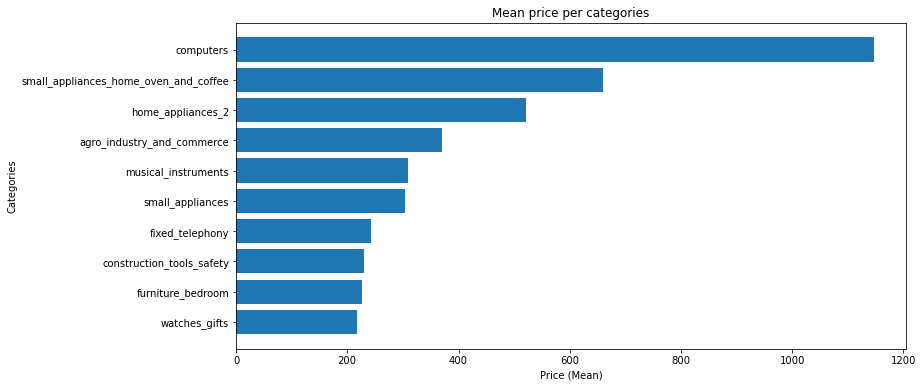

In [665]:
# Plotting the chart 3 which contains the mean price over the type of products
# This one i would rather to plot in a horizontal bar and in a big size plot to get easier to see it 

plt.barh(product_price_group_s_subset.index,product_price_group_s_subset["Mean (R$)"])
plt.gca().invert_yaxis()
plt.ylabel("Categories")
plt.xlabel("Price (Mean)")
plt.title("Mean price per categories")
plt.gcf().set_size_inches(12, 6)
plt.show()

In [666]:
# In the database, the column "order_item_id" contains the unique orders and the orders which is ore than mone item it repeats but using numbers bigger than 1, like 2,3 until 21
# So when there is a number different than 1 in this column, it means that there is a repetition of the order. So i desconsidered all
# the rows which is different than 1. Therefore, i can get the uniques orders 
product_items = products_prices_merged[products_prices_merged["order_item_id"]==1]

# Verifying if there is no duplicates in product_id in table customers_clean
product_items.drop_duplicates(subset = "order_id", inplace=True)

C:\Users\thale_fb5x52n\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [667]:
#Counting the number of orders for each classification
num_orders = product_items.groupby(["product_category_name_english"]).count()

In [668]:
# Droping some columns and sorting to make the dataframe cleaner
num_orders.drop(num_orders.columns[[1,2,3,4]],axis=1,inplace=True)
num_orders.sort_values(by="order_id",ascending = False,inplace=True)
num_orders_subset.columns = ["Number of orders"]

In [669]:
# Subsetting the dataframe in order to get just the mos relevant categories and make the chart clean 
num_orders_subset = num_orders[num_orders["order_id"]>3500]

print(num_orders_subset)

                               order_id
product_category_name_english          
bed_bath_table                     9311
health_beauty                      8796
sports_leisure                     7681
computers_accessories              6660
furniture_decor                    6355
housewares                         5829
watches_gifts                      5601
telephony                          4182
auto                               3880
toys                               3861
cool_stuff                         3603


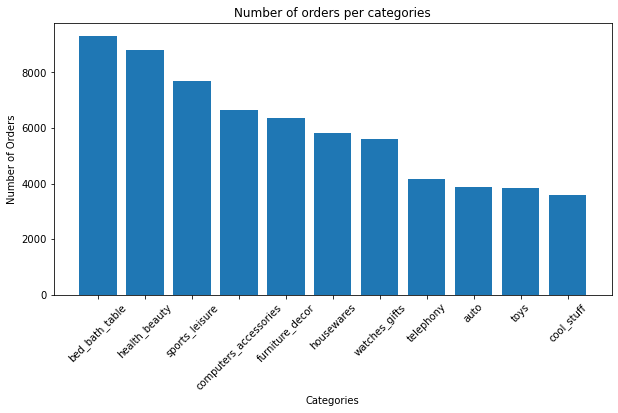

In [670]:
# Plotting the chart 4 which contains the number of orgers over the type of products
# Same process as the others bu in this one i'd like to show how to plot the most simple chart 
plt.bar(num_orders_subset.index,num_orders_subset["order_id"])
plt.xticks(rotation=45)
plt.xlabel("Categories")
plt.ylabel("Number of Orders")
plt.title("Number of orders per categories")
plt.gcf().set_size_inches(10, 5)
plt.show()